In [1]:
import os
import subprocess
import pandas
from collections import defaultdict
import tempfile
import shutil

In [2]:
os.getcwd()
#os.chdir('pgv-interesting-mosaicism')

'/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaicism'

In [3]:
def new_temp_copy(og_path, new_name):
    original_dir = os.path.dirname(og_path)
    temp_dir = tempfile.mkdtemp(dir='temp/')
    temp_file_path = os.path.join(temp_dir, new_name)
    shutil.copy2(og_path, temp_file_path)
    return temp_file_path

In [4]:
def get_files(contigs, pid_map):
    files = []
    for contig in contigs:
        og_path = f'../asm_genbanks/{contig}.gbff'
        pid = pid_map[contig]
        if 'contig' in contig:
           new_name = f'{contig.split('_')[0]}_{pid}.gbff'
        else:
            new_name = contig
        temp_renamed = new_temp_copy(og_path, new_name)
        files.append(temp_renamed)
    return files

In [5]:
def get_mmseqs_command(files, output_path):
    # Set up the command to run one genome vs another.
    # Changed params for length_thr from 1000 to 250
    # Changed params to not output plot and png 
    command = ['pgv-mmseqs', '-q', '--threads=14']
    for file in files:
        command.append(file)
    command.extend(['-o', output_path, '--show_scale_bar', '--curve','--length_thr=100', '--identity_thr=70']) #apparently both default to 0 lol.
    return command

def run_command(command):
    try:
        # Run the command
        result = subprocess.run(command, check=True, capture_output=True, text=True)
        return f'Successfully completed: {' '.join(command)}' if result.returncode == 0 else result.stderr
    
    except subprocess.CalledProcessError as e:
        return f"Command '{command}' failed with error: {e.stderr}"
    
    except Exception as e:
        return f"An unexpected error occurred: {str(e)}"

def generate_plot(files, pid_map, outname):
    paths = get_files(files, pid_map)
    print(paths)
    command = get_mmseqs_command(paths, outname)
    print("running command!")
    run_command(command)
    
    print('now deleting temp files!')
    for path in paths:
        tdir = os.path.dirname(path)
        os.remove(path)
        os.rmdir(tdir)
    
    print('compressing output!')
    tarcmd = ['tar', '-czvf', f'{outname}.tar.gz', f'{outname}/']
    tcmd = ' '.join(tarcmd)
    subprocess.run(tcmd, check=True, shell=True)

In [6]:
pids = '../../plasmid_id/v9/best_matches_v9_1kb_mapper.csv'
pid_map = defaultdict()
pi_df = pandas.read_csv(pids)
for idx, row in pi_df.iterrows():
    pid_map[row['aln_id']] = row['best_hit']

In [25]:
plot1_files = [
    'UNY172P_B356_lp28-2',
    'URI102H_contig000002',
    'UCT109H_contig000002',
    'URI40H_contig000016',
    'URI42H_contig000002',
]
files = [
    'UNY172P_B356_lp28-4',
    'UWI283P_MC149_lp28-4',
    'UNY208P_MR641_lp28-4',
    'URI102H_contig000002',
    'UCT109H_contig000002',
    'URI40H_contig000016',
    'URI42H_contig000002',
]
generate_plot(files, pid_map, 'lp28-2-b')

['/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaicism/tmpqczk1d3r/UNY172P_B356_lp28-4', '/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaicism/tmp1pfelnz4/UWI283P_MC149_lp28-4', '/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaicism/tmp1svjgrl4/UNY208P_MR641_lp28-4', '/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaicism/tmp0jq6g0so/URI102H_lp28-2.gbff', '/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaicism/tmprlc5i8qs/UCT109H_lp28-2.gbff', '/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaicism/tmpvyf8h1e9/URI40H_lp28-4.gbff', '/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaicism/tmpoujh4s_5/URI42H_cp32-10.gbff']
running command!
now deleting temp files!
compressing output!
lp28-2-b/
lp28-2-b/.ipynb_checkpoints/
lp28-2-b/.ipynb_checkpoints/result-checkpoint.html
lp28-2-b/.ipynb_checkpoints/result-checkpoint.png
lp28-2-b/result.png
lp28-2-b/result.html
lp28-2-b/align_coords.tsv
lp28-2-b/pgv-cli.log


In [46]:
plot3 = [
    'URI39H_contig000020',
    'URI89H_contig000020',
    'URI91H_contig000021',
    'URI120H_contig000021',
    'URI41H_contig000004',
    'URI93H_contig000003',
    'UCT31H_contig000020',
    'URI102H_contig000016',
    'URI107H_contig000019',
    'UCT109H_contig000017',
    'URI87H_contig000019',
    'UCT29H_contig000020',
    'URI101H_contig000021',
    'URI111H_contig000019',
    'URI40H_contig000018',
    'URI42H_contig000016',
    #'URI93H_contig000018', #too short :(
]
plot4 = [
    'URI88H_contig000003',
    'URI103H_contig000018',
    'URI86H_contig000015',
    'URI118H_contig000016',
    'URI44H_contig000012',
    'URI46H_contig000016',
    'URI112H_contig000010',
    #'URI117H_contig000017',
    'UCT30H_contig000005',
    'UCT110H_contig000012',
    'UNY149P_B247_lp28-1',
    'UCT92H_contig000017',
    'UCT32H_contig000015',
    'URI47H_contig000014',
]

In [ ]:
generate_plot(plot3, pid_map, 'plot3')

In [29]:
generate_plot(plot4, pid_map, 'plot4')

['/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaicism/tmpcpx1y62s/URI88H_lp28-7.gbff', '/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaicism/tmpj488xgf4/URI103H_lp28-1.gbff', '/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaicism/tmp_obxnjcm/URI86H_lp28-1.gbff', '/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaicism/tmpm8t1i5oy/URI118H_lp28-1.gbff', '/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaicism/tmpehulaih0/URI44H_lp28-1.gbff', '/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaicism/tmp704z84fu/URI46H_lp28-1.gbff', '/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaicism/tmpz48jzp_s/URI112H_lp28-1.gbff', '/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaicism/tmpximv51ie/UCT30H_lp28-5.gbff', '/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaicism/tmp3xtkrygk/UCT110H_lp28-1.gbff', '/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaicism/tmpv8a752xe/UNY149P_B247_lp28-1', '/ho

In [38]:
surface_lipos =["BB_0158","BB_0171","BB_0213","BB_0352","BB_0689","BB_0758","BB_0823","BB_A04","BB_A07","BB_A14", "BB_A15",
                             "BB_A16", "BB_A24", "BB_A32", "BB_A33", "BB_A36", "BB_A57", "BB_A59","BB_A64","BB_A65","BB_A68", "BB_A69",
                             "BB_B08", "BB_B19", "BB_B25", "BB_C10", "BB_D10", "BB_E04a", "BB_E08","BB_E31","BB_F01","BB_F20", "BB_G01",
                             "BB_H01", "BB_H06", "BB_H18", "BB_H32", "BB_H37", "BB_I14", "BB_I16","BB_I28","BB_I29","BB_I36", "BB_I38",
                             "BB_I39", "BB_I42", "BB_J01", "BB_J09", "BB_J34", "BB_J36", "BB_J41","BB_K01","BB_K07","BB_K12", "BB_K19",
                             "BB_K32", "BB_K48", "BB_K50", "BB_K52", "BB_K53", "BB_L28", "BB_L39","BB_L40","BB_M27","BB_M28", "BB_M38",
                             "BB_N28", "BB_N38", "BB_N39", "BB_O28", "BB_O39", "BB_O40", "BB_P27","BB_P28","BB_P38","BB_P39", "BB_Q03",
                             "BB_Q05", "BB_Q35", "BB_Q47", "BB_Q89", "BB_R28", "BB_R40", "BB_R42","BB_S30","BB_S41"]

In [28]:
from pygenomeviz import GenomeViz
from pygenomeviz.parser import Genbank
from pygenomeviz.align import AlignCoord, MMseqs

In [50]:
gbk_files = get_files(plot3, pid_map)

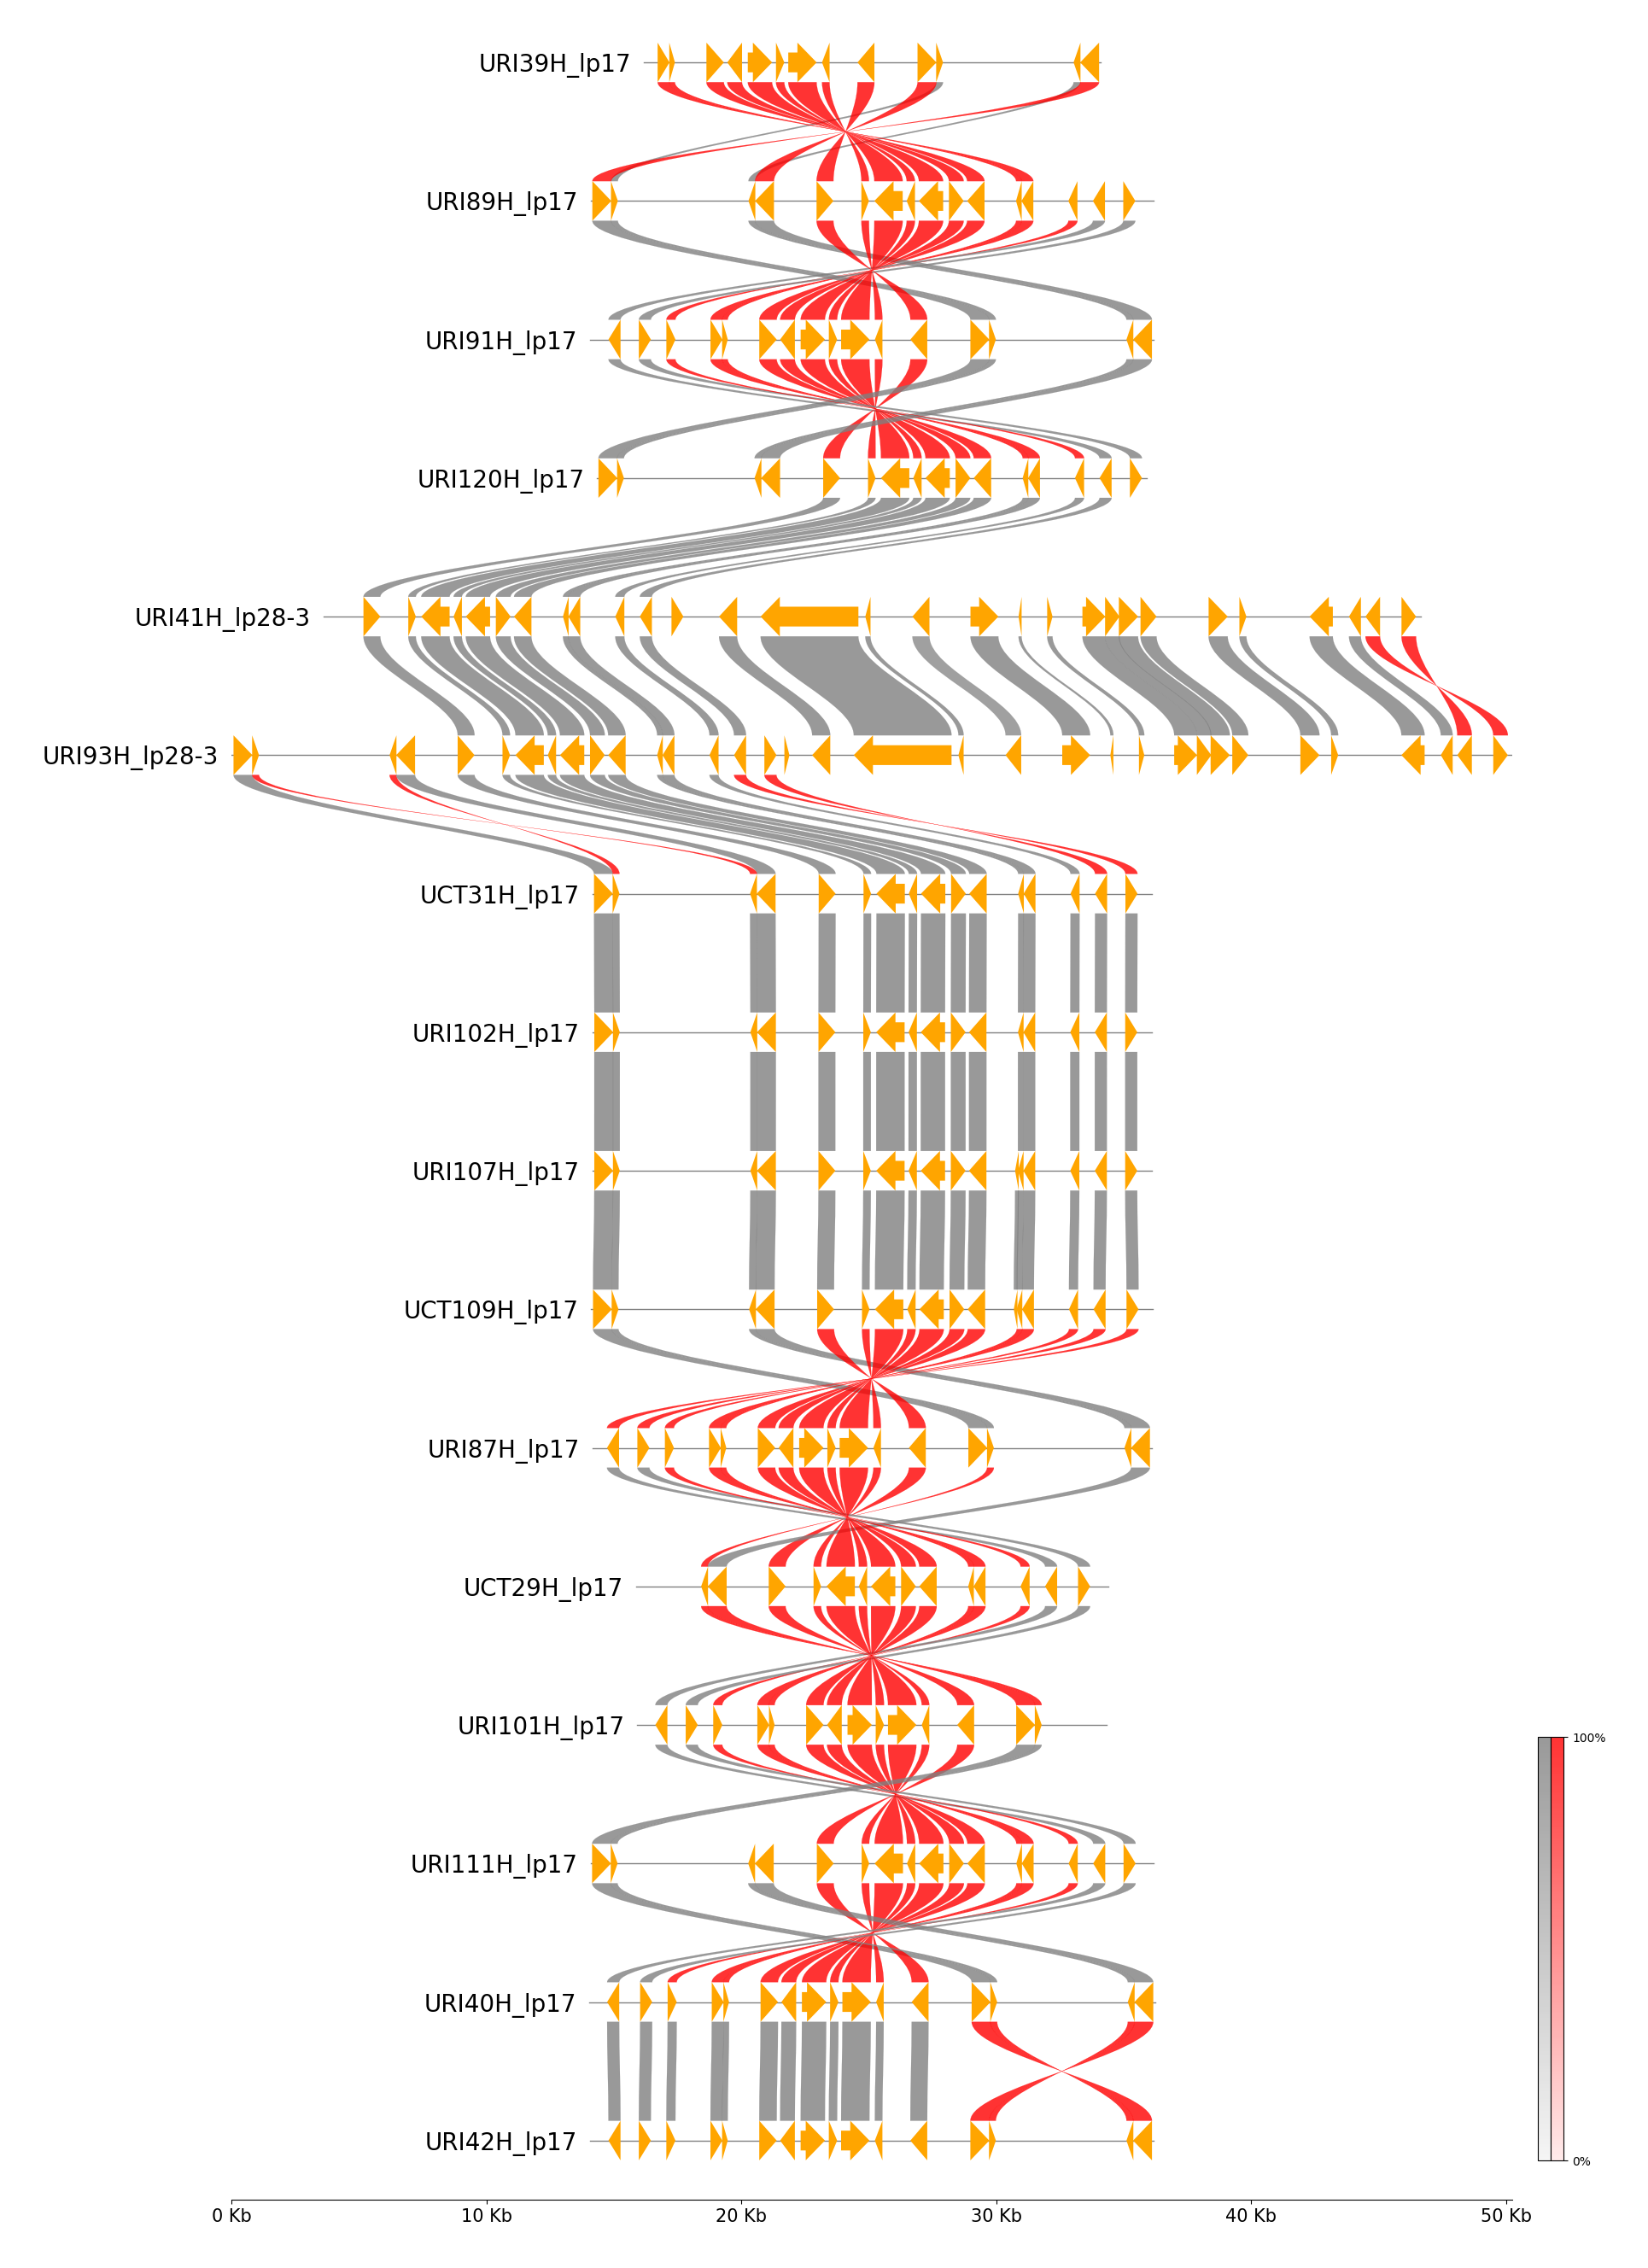

In [57]:
gbk_list = list(map(Genbank, gbk_files))

gv = GenomeViz(fig_track_height=0.8, feature_track_ratio=0.4)
gv.set_scale_xticks()

# Plot CDS features
for gbk in gbk_list:
    track = gv.add_feature_track(gbk.name, gbk.get_seqid2size(), align_label=False, offset='center')
    for seqid, features in gbk.get_seqid2features("CDS").items():
        segment = track.get_segment(seqid)
        segment.add_features(features, plotstyle="bigarrow", color='orange', label_type="CDS")

# Run MMseqs RBH search
align_coords = MMseqs(gbk_list).run()

# Plot MMseqs RBH search links
if len(align_coords) > 0:
    min_ident = int(min([ac.identity for ac in align_coords if ac.identity]))
    color, inverted_color = "grey", "red"
    for ac in align_coords:
        gv.add_link(ac.query_link, ac.ref_link, color=color, inverted_color=inverted_color, v=ac.identity, vmin=0, curve=True)
    gv.set_colorbar([color, inverted_color], vmin=0)

fig = gv.plotfig(fast_render=False)
fig.savefig('plot3_v2.png')
gv.savefig_html('plot3_v2.html', fig)

In [8]:
lp28_4 = [
    'URI39H_contig000018',
'URI89H_contig000017',
'URI91H_contig000019',
'URI120H_contig000020',
'URI41H_contig000015',
'UCT31H_contig000019',
'UCT96H_contig000013',
'ESI26H_contig000008',
'URI33H_contig000012',
'URI48H_contig000003',
'UNY172P_B356_lp28-4',
'UWI283P_MC149_lp28-4',
'UCT50H_contig000002',
'UNY169P_B348_lp28-4',
'URI36H_contig000012',
'URI56H_contig000005',
'UNY193P_B477_lp28-4',
'URI34H_contig000005',
'UCT35H_contig000002',
'UWI247P_MC104_lp28-4',
'UWI248P_MC105_lp28-4',
'UCT113H_contig000011',
'UNY208P_MR641_lp28-4',
'URI88H_contig000002',
'UWI263P_MC123_lp28-4',
'URI103H_contig000011',
'URI86H_contig000002',
'URI118H_contig000009',
'URI44H_contig000007',
'URI46H_contig000009',
'URI112H_contig000008',
'URI117H_contig000007',
'UCT30H_contig000002',
'UCT110H_contig000008',
'UNY149P_B247_lp28-4',
'UCT92H_contig000014',
'UCT32H_contig000013',
'URI47H_contig000004',
'URI93H_contig000017',
'URI107H_contig000017',
'URI87H_contig000018',
'UCT29H_contig000017',
'URI101H_contig000019',
'URI111H_contig000018',
'URI40H_contig000016',
]

In [9]:
generate_plot(lp28_4, pid_map, 'lp28-4a')

['/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaicism/temp/tmpl1nhhukg/URI39H_lp28-4.gbff', '/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaicism/temp/tmpy9epelev/URI89H_lp28-4.gbff', '/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaicism/temp/tmph0hxxbze/URI91H_lp28-4.gbff', '/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaicism/temp/tmpkgajk0b5/URI120H_lp28-4.gbff', '/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaicism/temp/tmpkavctsyu/URI41H_lp28-4.gbff', '/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaicism/temp/tmpkrex2uoc/UCT31H_lp28-4.gbff', '/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaicism/temp/tmp9tf8ri4b/UCT96H_lp28-4.gbff', '/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaicism/temp/tmpmqr5tk3u/ESI26H_lp28-4.gbff', '/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaicism/temp/tmpfmze1d_c/URI33H_lp28-4.gbff', '/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaic

In [10]:
lp28_2 = [
    'URI39H_contig000015',
'URI89H_contig000014',
'URI91H_contig000017',
'URI120H_contig000014',
'URI41H_contig000013',
'UCT31H_contig000016',
'UCT96H_contig000011',
'UNY172P_B356_lp28-2',
'UWI283P_MC149_lp28-2',
'UNY169P_B348_lp28-2',
'UNY193P_B477_lp28-x',
'URI34H_contig000010',
'URI93H_contig000014',
'URI102H_contig000002',
'URI107H_contig000013',
'UCT109H_contig000002',
'URI87H_contig000014',
'UCT29H_contig000013',
'URI101H_contig000015',
'URI111H_contig000015',
'URI40H_contig000013',
'URI42H_contig000013',
]

In [ ]:
generate_plot(lp28_4, pid_map, 'lp28-2c')

In [12]:
get_files(['UCT35H_contig000002'], pid_map)

['/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaicism/temp/tmp3vtjexgk/UCT35H_lp28-4.gbff']

In [24]:
from Bio import SeqIO
dic = {}
for rec in SeqIO.parse('/home/mf019/longread_pangenome/synteny/pgv-interesting-mosaicism/temp/tmp3vtjexgk/UCT35H_lp28-4.gbff', 'genbank'):
    dic[rec.id] = rec
first_flank = dic['contig000002'].seq[0:28001]
tail_flank = dic['contig000002'].seq[55794::]
with open('first_flank_UCT35H_c2.fasta', 'w') as file:
    file.write(str(first_flank))
with open('tail_flank_UCT35H_c2.fasta', 'w') as file:
    file.write(str(tail_flank))
with open('totalUCT35H_c2.fasta', 'w') as file:
    file.write(str(dic['contig000002'].seq))